In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import csv
import requests
from scipy import stats
headers = { 
    'accept': "application/json", 
    'apikey': "6d8eb8463ade29d77a7b42f7211aa691" } 
cities_df = pd.read_csv("./ViolentCrime2017.csv")
cities_df.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants"
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45


In [126]:
base_url ="https://search.onboard-apis.com/areaapi/v2.0.0/state/lookup"
res = requests.get(base_url,headers=headers).json()
res
st_data =pd.DataFrame(res['response']['result']['package']['item'])
st_data.rename(columns={'name':'State','geo_key':'St_geo_key'}, inplace=True)
statedata = st_data[['State','St_geo_key','abbreviation']]
city_table =pd.merge(cities_df, statedata, on="State", how="left")
city_table.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45,ST34,NJ


In [134]:
appended_new = pd.DataFrame([])
for index, row in city_table.iterrows():
    stgc = row['St_geo_key']
    city = row['City']  
    city_url ="https://search.onboard-apis.com/areaapi/v2.0.0/geoid/lookup/?geoId="+stgc+"&GeoType=PL" 
    
    resc = requests.get(city_url,headers=headers).json()
    city_data = pd.DataFrame(resc['response']['result']['package']['item'])
    
    new = city_data.loc[city_data['name'] == city]      
    appended_new = appended_new.append(new)
    
appended_new.head()

,area,area_unit,geo_key,id,name,type
1747,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
601,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
752,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
867,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
671,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [135]:
city_table1 =pd.merge(city_table, appended_new, left_on=['City'], right_on=['name'])
city_table1.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,area,area_unit,geo_key,id,name,type
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
4,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,ST18,IN,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [136]:
appended_main = pd.DataFrame([])

for index, row in city_table1.iterrows():
    cgc = row['geo_key']
  
    base_url="https://search.onboard-apis.com/communityapi/v2.0.0/area/full?AreaId="+cgc
    
    resct = requests.get( base_url,headers=headers).json()
    city_data2 = pd.DataFrame(resct['response']['result']['package']['item'])
    appended_main = appended_main.append(city_data2)
 
    #appended_new = appended_new.append(new)
    
# cocrmcyasst : Assault Risk (County)
# cocrmcytotc : Total Crime Risk (County)
crime = appended_main[['name','latitude','geo_key','longitude','cocrmcyasst','cocrmcytotc']]
crime.head()

,name,latitude,geo_key,longitude,cocrmcyasst,cocrmcytotc
0,Erie,42.115943,PL4224000,-80.073991,79,83
0,Renton,47.478434,PL5357745,-122.183594,59,127
0,Kenosha,42.584065,PL5539225,-87.852219,39,70
0,Davie,26.080792,PL1216475,-80.280488,103,112
0,South Bend,41.670857,PL1871000,-86.253333,41,119


In [137]:
crime0 =pd.merge(city_table, crime, left_on=['City'], right_on=['name'])
crime0.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,name,latitude,geo_key,longitude,cocrmcyasst,cocrmcytotc
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,PL4224000,-80.073991,79,83
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,Renton,47.478434,PL5357745,-122.183594,59,127
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI,Kenosha,42.584065,PL5539225,-87.852219,39,70
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,Davie,26.080792,PL1216475,-80.280488,103,112
4,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,ST18,IN,South Bend,41.670857,PL1871000,-86.253333,41,119


In [139]:
crime2 = crime0.reset_index()
crime1 = crime2.drop(columns=['index'])
# crime1 = crime1.iloc[0:9,:]
crime1.shape

(325, 17)

In [140]:
schools = pd.DataFrame(columns=['city_name','latitude','longitude','geo_key','cocrmcyasst','cocrmcytotc','school_id'])
schoolCount = 0
for index, row in crime1.iterrows():
    print(f"Processing City Name: {row['name']}")
    lat = row['latitude']
    lng = row['longitude']  
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/snapshot?latitude="+lat+"&longitude="+lng+"&radius=50&filetypetext=public"
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = response.json()
            for a_school in resch['school']:
                schools.loc[schoolCount] = [row['name'],row['latitude'], row['longitude'],row['geo_key'],row['cocrmcyasst'],row['cocrmcytotc'],a_school['Identifier']['OBInstID'] ]
                schoolCount += 1
        else:
            print("School not found. Skipping...")
    except:         
        print("Unknown exception...")
        pass

schools.head()

Processing City Name: Erie
Processing City Name: Renton
Processing City Name: Kenosha
Processing City Name: Davie
Processing City Name: South Bend
Processing City Name: Las Cruces
Processing City Name: Tyler
Processing City Name: Lakeland
Processing City Name: Rialto
Processing City Name: Clovis
Processing City Name: Sandy Springs
Processing City Name: El Cajon
Processing City Name: San Mateo
Processing City Name: Santa Maria
Processing City Name: Lewisville
Processing City Name: West Palm Beach
Processing City Name: Green Bay
Processing City Name: Wichita Falls
Processing City Name: College Station
Processing City Name: Burbank
Processing City Name: Burbank
Processing City Name: Broken Arrow
Processing City Name: Palm Bay
Processing City Name: Pearland
Processing City Name: Daly City
Processing City Name: Norwalk
Processing City Name: Everett
Processing City Name: Pompano Beach
Processing City Name: Pueblo
Processing City Name: West Covina
Processing City Name: Waterbury
Processing Ci

Processing City Name: Miami
Processing City Name: Omaha
Processing City Name: Colorado Springs
Processing City Name: Virginia Beach
Processing City Name: Atlanta
Processing City Name: Mesa
Processing City Name: Kansas City
Processing City Name: Long Beach
Processing City Name: Sacramento
Processing City Name: Fresno
Processing City Name: Tucson
Processing City Name: Albuquerque
Processing City Name: Milwaukee
Processing City Name: Baltimore
Unknown exception...
Processing City Name: Oklahoma City
Processing City Name: Memphis
Processing City Name: Detroit
Processing City Name: Denver
Processing City Name: Seattle
Processing City Name: El Paso
Processing City Name: Fort Worth
Processing City Name: Columbus
Processing City Name: San Francisco
Processing City Name: Jacksonville
Processing City Name: Austin
Processing City Name: San Jose
Processing City Name: Dallas
Processing City Name: San Diego
Processing City Name: San Antonio
Processing City Name: Philadelphia
Processing City Name: Ho

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016


In [141]:
schools.shape

(3144, 7)

In [142]:
for index, row in schools.iterrows():
    city_name = row['city_name']
    school_id = row['school_id']         
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/detail?id="+school_id
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = response.json()
            #Studentteacher is School enrollment student teacher
            schools.loc[index,'studentteacherratio'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher']
            schools.loc[index,'highschool'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolSummary']['High']
#             print(resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher'])
        else:
            print("Data not found. Skipping...") 
    except:         
        print(f"Unknown exception for city {city_name} school {school_id}...")
        pass
schools.head()

Unknown exception for city Davie school 01413345...
Unknown exception for city Las Cruces school 01171846...
Unknown exception for city Clovis school 00056748...
Unknown exception for city El Cajon school 00111257...
Unknown exception for city San Mateo school 00122945...
Unknown exception for city San Mateo school 00122971...
Unknown exception for city Santa Maria school 00124797...
Unknown exception for city Lewisville school 5700078313...
Unknown exception for city Wichita Falls school 01173246...
Unknown exception for city College Station school 02202761...
Unknown exception for city Burbank school 5700083443...
Unknown exception for city Burbank school 00066846...
Unknown exception for city Everett school 01110505...
Unknown exception for city West Covina school 00082943...
Unknown exception for city West Covina school 5700050268...
Unknown exception for city Murrieta school 03253878...
Unknown exception for city Richmond school 01087984...
Unknown exception for city Richmond scho

Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skip

Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skip

Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skip

Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skipping...
Data not found. Skip

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991,11,None
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157,11,None
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016,14,None


In [145]:
schools2 =pd.merge(city_table, schools, left_on=['City'], right_on=['city_name'])
schools2.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
2,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,02107991,11,None
3,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,00909157,11,None
4,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,00909016,14,None


In [146]:
#remove data when student teacher ratio is not reported
schools_data = schools2
# schools_data2 = schools_data.loc[schools_data['studentteacherratio'] != 'Not Reported', :] 
schools_data2 = schools_data.loc[(schools_data['studentteacherratio'] != 'Not Reported') & (schools_data['highschool'] == 'Y'), :] 
schools_data2.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
6,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,00909121,13,Y
13,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,Renton,47.478434,-122.183594,PL5357745,59,127,01101841,21,Y
39,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,Davie,26.080792,-80.280488,PL1216475,103,112,00183523,20,Y


In [147]:
schools_data2.shape

(476, 20)

In [148]:
#convert student teacher ratio column data to integer
schools_data2['studentteacherratio'] = schools_data2['studentteacherratio'].astype(str).astype(int)
schools_data2['cocrmcyasst'] = schools_data2['cocrmcyasst'].astype(str).astype(int)
schools_data2['cocrmcytotc'] = schools_data2['cocrmcytotc'].astype(str).astype(int)

schools_data2.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio,highschool
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,04791835,17,Y
1,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,05286986,12,Y
6,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,Erie,42.115943,-80.073991,PL4224000,79,83,00909121,13,Y
13,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,Renton,47.478434,-122.183594,PL5357745,59,127,01101841,21,Y
39,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,Davie,26.080792,-80.280488,PL1216475,103,112,00183523,20,Y


In [150]:
# calculate average student teacher ratio for each city
schools_city = schools_data2.groupby(['City','State'])['cocrmcyasst','cocrmcytotc','studentteacherratio'].mean()
schools_city.head()

,,cocrmcyasst,cocrmcytotc,studentteacherratio
City,State,,,
Alexandria,Virginia,68.0,106.0,14.5
Allentown,Pennsylvania,65.0,78.0,13.5
Amarillo,Texas,155.0,137.0,23.5
Ann Arbor,Michigan,124.0,96.0,19.0
Antioch,California,72.0,68.0,19.5


In [157]:
schools_city2 = schools_city.reset_index()
schools_city2.head()

,City,State,cocrmcyasst,cocrmcytotc,studentteacherratio
0,Alexandria,Virginia,68.0,106.0,14.5
1,Allentown,Pennsylvania,65.0,78.0,13.5
2,Amarillo,Texas,155.0,137.0,23.5
3,Ann Arbor,Michigan,124.0,96.0,19.0
4,Antioch,California,72.0,68.0,19.5


In [153]:
#get percet of high school gradute or higher data
base_url = 'https://odn.data.socrata.com/resource/8apn-rhyh.json?&variable=percent_high_school_graduate_or_higher&type=place&year=2017&$limit=1500000'
headers = {
    'apikey': "y7qEzTXmdu4mI7zRlsejOJgpF" }

response = requests.get(base_url, headers=headers).json()
test=pd.DataFrame(response)
states = [row.split(", ")[1] for row in test.name]
cities = [row.split(", ")[0] for row in test.name]
test["City"] = cities
test["State"] = states
test.replace(" city","",regex=True, inplace=True)
# new = test.loc[(test['State'] == 'Michigan')]
# new2 = new.loc[(new['name']=='Detroit city, Michigan')]
graduate=test.replace(" CDP","",regex=True, inplace=False)

graduate.head()

,id,name,type,value,variable,year,City,State
0,1600000US2642460,"Keego Harbor, Michigan",place,91.7,percent_high_school_graduate_or_higher,2017,Keego Harbor,Michigan
1,1600000US4873057,"Timberwood Park, Texas",place,93.9,percent_high_school_graduate_or_higher,2017,Timberwood Park,Texas
2,1600000US1818550,"Dover Hill, Indiana",place,100,percent_high_school_graduate_or_higher,2017,Dover Hill,Indiana
3,1600000US5464516,"Poca town, West Virginia",place,89.5,percent_high_school_graduate_or_higher,2017,Poca town,West Virginia
4,1600000US2060825,"Roeland Park, Kansas",place,96.8,percent_high_school_graduate_or_higher,2017,Roeland Park,Kansas


In [154]:
graduate.shape

(29567, 8)

In [218]:
#convert number data type for 'value'
graduate['value'] = graduate['value'].astype(float)

In [219]:
schools_city3 =pd.merge(city_table, schools_city2, left_on=['City','State'], right_on=['City','State'])
schools_all =pd.merge(schools_city3, graduate, how = 'inner', left_on=['City','State'], right_on=['City','State'])
schools_all.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,cocrmcyasst,cocrmcytotc,studentteacherratio,id,name,type,value,variable,year
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,79.0,83.0,14.0,1600000US4224000,"Erie, Pennsylvania",place,86.4,percent_high_school_graduate_or_higher,2017
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,59.0,127.0,21.0,1600000US5357745,"Renton, Washington",place,91.2,percent_high_school_graduate_or_higher,2017
2,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,ST18,IN,41.0,119.0,17.0,1600000US1871000,"South Bend, Indiana",place,83.4,percent_high_school_graduate_or_higher,2017
3,New Mexico,Las Cruces,102227,126,2351,0,123.26,0.02,2299.78,ST35,NM,98.0,89.0,18.0,1600000US3539380,"Las Cruces, New Mexico",place,86.8,percent_high_school_graduate_or_higher,2017
4,Texas,Tyler,"102,481",206,"2,002",0,201.01,0.02,1953.53,ST48,TX,109.0,122.0,15.0,1600000US4874144,"Tyler, Texas",place,83.5,percent_high_school_graduate_or_higher,2017


In [220]:
schools_all.columns

Index(['State', 'City', 'Population', 'Violent\ncrime', 'Property\ncrime',
       'Violent Crime per pop', 'Violent crime rate per 100,000 inhabitants',
       'Property crime per pop', 'Property crime per 100,000 inhabitants',
       'St_geo_key', 'abbreviation', 'cocrmcyasst', 'cocrmcytotc',
       'studentteacherratio', 'id', 'name', 'type', 'value', 'variable',
       'year'],
      dtype='object')

In [221]:
schools_all_rename = schools_all.rename(index=str, columns={'Violent\ncrime': 'Violent crime', 
                                                            'Property\ncrime':'Property crime',
                                                            "cocrmcyasst": "Assault Risk (County)",
                                                            "cocrmcytotc": "Total Crime Risk (County)",
                                                            "studentteacherratio": "Student Teacher Ratio",
                                                            "value": "Percent of High School Graduate or Higher"
                                                           })
schools_alldata = schools_all_rename[['State','City','Population','Violent crime','Property crime','Violent Crime per pop',
                                     'Violent crime rate per 100,000 inhabitants','Property crime per pop',
                                     'Property crime per 100,000 inhabitants', 'Assault Risk (County)',
                                     'Total Crime Risk (County)','Student Teacher Ratio',
                                     'Percent of High School Graduate or Higher','year']]
schools_alldata.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",Assault Risk (County),Total Crime Risk (County),Student Teacher Ratio,Percent of High School Graduate or Higher,year
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,79.0,83.0,14.0,86.4,2017
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,59.0,127.0,21.0,91.2,2017
2,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,41.0,119.0,17.0,83.4,2017
3,New Mexico,Las Cruces,102227,126,2351,0,123.26,0.02,2299.78,98.0,89.0,18.0,86.8,2017
4,Texas,Tyler,"102,481",206,"2,002",0,201.01,0.02,1953.53,109.0,122.0,15.0,83.5,2017


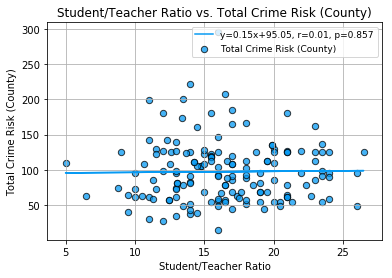

r-squared: 0.000213


In [299]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)

x = schools_alldata['Student Teacher Ratio']
y = schools_alldata['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

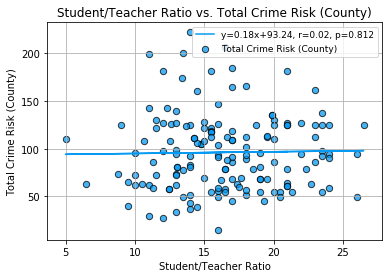

r-squared: 0.000371


In [298]:
#remove outlier for Total Crime Risk (County)
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
schools_alldata_outliercrime = schools_alldata.loc[schools_alldata['Total Crime Risk (County)']<250,:]

x = schools_alldata_outliercrime['Student Teacher Ratio']
y = schools_alldata_outliercrime['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

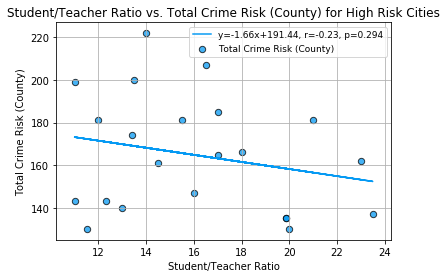

r-squared: 0.054946


In [297]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
# only high total crime risk cities
schools_city_totalc_high = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Total Crime Risk (County)']>=130,:]
x = schools_city_totalc_high['Student Teacher Ratio']
y = schools_city_totalc_high['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

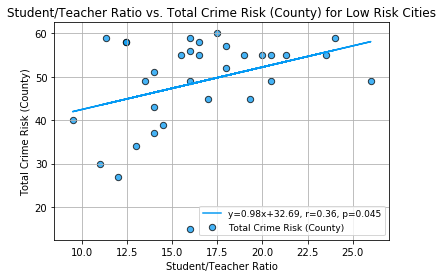

r-squared: 0.127404


In [295]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
# only low total crime risk cities
schools_city_totalc_high = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Total Crime Risk (County)']<=60,:]
x = schools_city_totalc_high['Student Teacher Ratio']
y = schools_city_totalc_high['Total Crime Risk (County)']

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for Low Risk Cities")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

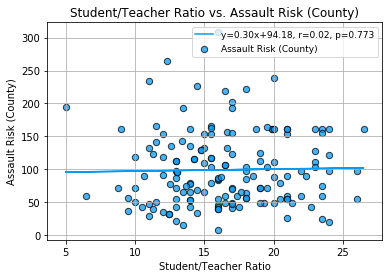

r-squared: 0.000541


In [294]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst
x = schools_alldata['Student Teacher Ratio']
y = schools_alldata['Assault Risk (County)']

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County)")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

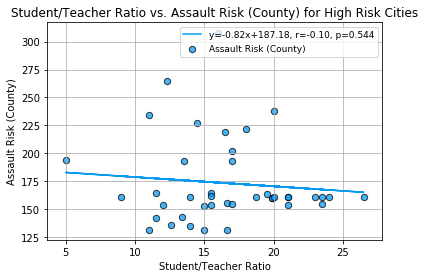

r-squared: 0.009513


In [293]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst
# only high assault risk cities
schools_city_totalc_high = schools_alldata.loc[schools_alldata['Assault Risk (County)']>=130,:]
x = schools_city_totalc_high['Student Teacher Ratio']
y = schools_city_totalc_high['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

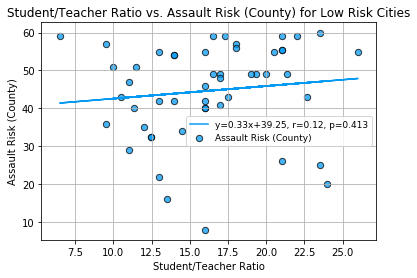

r-squared: 0.013991


In [292]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
# only low assault risk cities

schools_city_totalc_low = schools_alldata.loc[schools_alldata['Assault Risk (County)']<=60,:]
x = schools_city_totalc_low['Student Teacher Ratio']
y = schools_city_totalc_low['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County) for Low Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

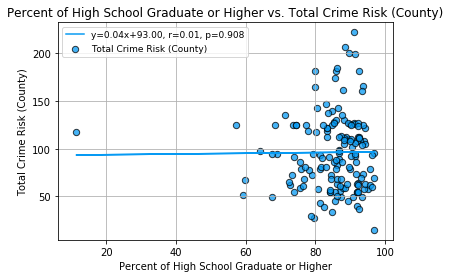

r-squared: 0.000087


In [291]:
# scatter plot for Percent of High School Graduate or Higher vs. Total Crime Risk (County)

x = schools_alldata_outliercrime['Percent of High School Graduate or Higher']
y = schools_alldata_outliercrime['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

In [258]:
#remove outlier and plot again
schools_alldata_outliergrad = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Percent of High School Graduate or Higher']>40,:]
schools_alldata_outliergrad.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",Assault Risk (County),Total Crime Risk (County),Student Teacher Ratio,Percent of High School Graduate or Higher,year
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,79.0,83.0,14.0,86.4,2017
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,59.0,127.0,21.0,91.2,2017
2,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,41.0,119.0,17.0,83.4,2017
3,New Mexico,Las Cruces,102227,126,2351,0,123.26,0.02,2299.78,98.0,89.0,18.0,86.8,2017
4,Texas,Tyler,"102,481",206,"2,002",0,201.01,0.02,1953.53,109.0,122.0,15.0,83.5,2017


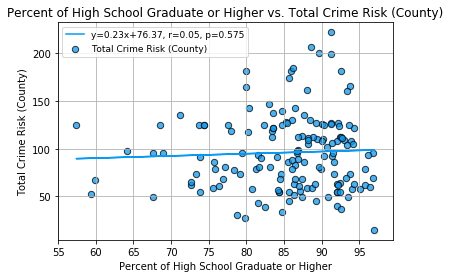

r-squared: 0.002078


In [290]:
# scatter plot for Percent of High School Graduate or Higher vs. Total Crime Risk (County)

x = schools_alldata_outliergrad['Percent of High School Graduate or Higher']
y = schools_alldata_outliergrad['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

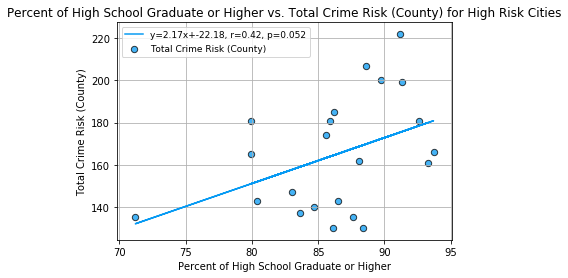

r-squared: 0.176147


In [289]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
# only high Total Crime risk cities

schools_city_totalc_high = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Total Crime Risk (County)']>=130,:]
x = schools_city_totalc_high['Percent of High School Graduate or Higher']
y = schools_city_totalc_high['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

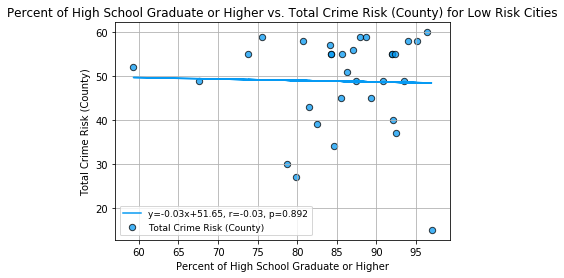

r-squared: 0.000625


In [288]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
# only low total crime risk cities
schools_city_totalc_high = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Total Crime Risk (County)']<=60,:]
x = schools_city_totalc_high['Percent of High School Graduate or Higher']
y = schools_city_totalc_high['Total Crime Risk (County)']

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County) for Low Risk Cities")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

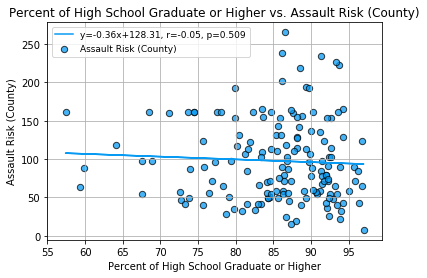

r-squared: 0.002869


In [287]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)

x = schools_alldata_outliergrad['Percent of High School Graduate or Higher']
y = schools_alldata_outliergrad['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

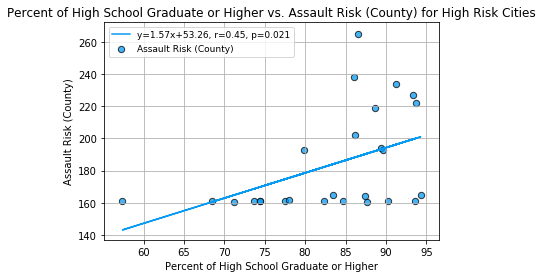

r-squared: 0.203564


In [280]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)
# only high Assault risk cities

schools_city_totalc_high = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Assault Risk (County)']>=160,:]
x = schools_city_totalc_high['Percent of High School Graduate or Higher']
y = schools_city_totalc_high['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)

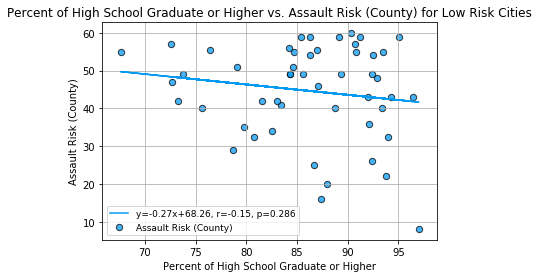

r-squared: 0.023631


In [286]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)
# only low Assault risk cities

schools_city_totalc_low = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Assault Risk (County)']<=60,:]
x = schools_city_totalc_low['Percent of High School Graduate or Higher']
y = schools_city_totalc_low['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County) for Low Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)